<a href="https://colab.research.google.com/github/schen304joseph/HW3/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A12= 1.95841966952408
A21= 1.6891850023576693


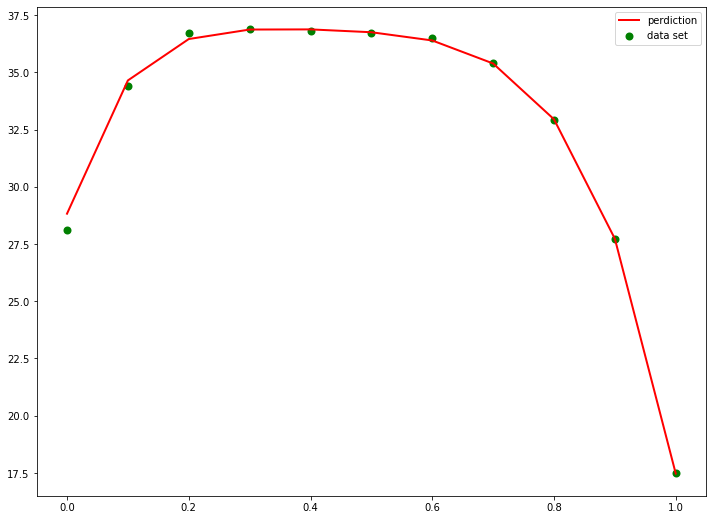

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x1 = np.arange(start=0, stop=1.1, step=0.1)
p = np.array([28.1,34.4,36.7,36.9,36.8,36.7,36.5,35.4,32.9,27.7,17.5])

def psat (a1,a2,a3):
  return 10**(a1-(a2/(20+a3)))

def pval (x1,A12,A21):
  x2 = 1-x1
  return x1*np.exp(A12*((A21*x2)/(A12*x1+A21*x2))**2)*psat(8.07131,1730.63,233.426)+x2*np.exp(A21*((A12*x1)/(A12*x1+A21*x2))**2)*psat(7.43155,1554.679,240.337)

c, cov = curve_fit(pval,x1,p)

n = len(x1)
y=np.empty(n)
for i in range(n):
  y[i]=pval(x1[i],c[0],c[1])

plt.scatter(x1,p,color="green",label="data set",linewidth=2)
plt.plot(x1,y,color="red",label="perdiction",linewidth=2)
plt.legend()
print("A12=",c[0])
print("A21=",c[1])

-150.89999999999998 {'x1': 3.0, 'x2': -2.0}
-3.791094933066752 {'x1': 1.9800114473239034, 'x2': 0.6405516686350072}
-3.6103908488482563 {'x1': -2.1041597209576226, 'x2': 0.5152470560110505}
-0.17098674179777262 {'x1': -0.7690908769730319, 'x2': 0.8069029088405918}
0.2831782823824037 {'x1': -0.5714687194419672, 'x2': 0.8013354966674036}
-0.02322821718639323 {'x1': -0.6069584097046314, 'x2': 0.8946588864771249}
0.5704524836629914 {'x1': -0.440076864581537, 'x2': 0.8035074745517637}
0.7861989048526763 {'x1': -0.34168819243167253, 'x2': 0.7741064720939825}
0.9228198961285778 {'x1': -0.2295708272640629, 'x2': 0.7836287039738776}
0.9971744006139186 {'x1': -0.18457237832683274, 'x2': 0.7263669553373657}
1.0273535185344032 {'x1': -0.10854575468227744, 'x2': 0.7324155931144659}
1.0266281795996468 {'x1': -0.08700951487451261, 'x2': 0.6874028761236823}
1.020281621247399 {'x1': -0.03615894195609025, 'x2': 0.7128844651107292}
1.031326253915359 {'x1': -0.08101131268807611, 'x2': 0.7122012671348258}


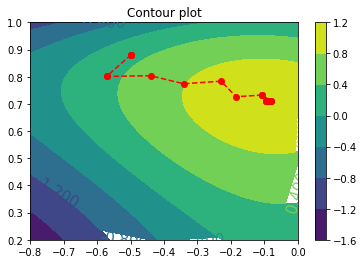

In [11]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
import numpy as np
import matplotlib.pyplot as plt

def black_box_function(x1, x2):
  return -((4-2.1*x1**2+((x1**4)/3))*x1**2+x1*x2+(-4+4*(x2**2))*(x2**2))
x1 = np.linspace(-0.8, 0, 500)
x2 = np.linspace(0.2, 1, 500)
x1, x2 = np.meshgrid(x1, x2)
Z = black_box_function(x1, x2)
fig = plt.figure()
plt.title('Contour plot')
contours=plt.contourf(x1, x2, Z,cmap='viridis')
plt.clabel(contours, inline=True, fontsize=15)
plt.colorbar()




optimizer = BayesianOptimization(
    f=None,
    pbounds={'x1': (-3, 3), 'x2': (-2, 2)},
    verbose=2,
    random_state=1,
)
from bayes_opt import UtilityFunction

utility = UtilityFunction(kind="ucb", kappa=2.5, xi=0.0)
next_point_to_probe = optimizer.suggest(utility)
#print("Next point to probe is:", next_point_to_probe)
target = black_box_function(**next_point_to_probe)
#print("Found the target value to be:", target)
optimizer.register(
    params=next_point_to_probe,
    target=target,
)
iterat=50
i=0
datax1=np.zeros(iterat)
datax2=np.zeros(iterat)
for i in range(iterat):
    next_point = optimizer.suggest(utility)
    target = black_box_function(**next_point)
    optimizer.register(params=next_point, target=target)
    #print(optimizer['target'])
    #print(optimizer.max['params']['x1'])
    #plt.plot(optimizer.max['params']['x1'],optimizer.max['params']['x2'],'ro--')
    print(target, next_point)
    datax1[i]=(optimizer.max['params']['x1'])
    datax2[i]=(optimizer.max['params']['x2'])
    i+=1
plt.plot(datax1,datax2,'ro--')
print(-optimizer.max['target'],-optimizer.max['params']['x1'],-optimizer.max['params']['x2'])